Lab 6 - Regresja liniowa

Dawid Kopeć 405602

Import potrzebnych modułów do obróbki i prezentacji danych

In [412]:
import pandas as pd
import numpy as np
import patsy
import sklearn
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import re
from copy import deepcopy

### Zadanie 1, plik SCORES

,Hours,Scores
0,1.1,17
1,1.5,20
2,1.9,24
3,2.5,21
4,2.5,30
5,2.7,30
6,2.7,25
7,3.2,27
8,3.3,42
9,3.5,30


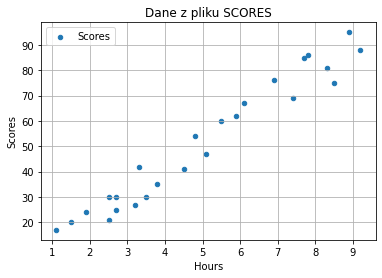

In [413]:
df = pd.read_csv('SCORES.csv', index_col=0)
df=df.sort_values(by='Hours', axis=0)
df=df.reset_index()
df.plot(kind='scatter', x='Hours', y='Scores', label='Scores')
plt.grid()
plt.title('Dane z pliku SCORES')
df

In [414]:
X_train, X_test, y_train, y_test = train_test_split(df.Hours, df.Scores, train_size=0.30, test_size=0.7)
X_train = np.array(X_train).reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

print('Estymowane współczynniki regresji: ', model.coef_)
print('Przewidywana wartość y dla x=0: ', model.intercept_)

Estymowane współczynniki regresji:  [9.91680532]
Przewidywana wartość y dla x=0:  0.9291656762538523


Mean Squared Error:  31.0943629975285
Mean Absolute Error:  5.203576050497846
Root Mean Squared Error:  5.576231971280293


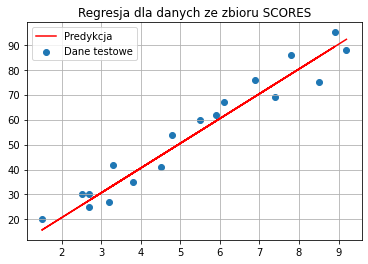

In [415]:
X_test = np.array(X_test).reshape(-1,1)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, label='Dane testowe')
plt.plot(X_test, y_pred, 'r', label='Predykcja')
plt.title('Regresja dla danych ze zbioru SCORES')
plt.grid()
plt.legend()

print('Mean Squared Error: ', sklearn.metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

### Zadanie 1, plik SBP

,Age,SBP
0,54,115
1,56,124
2,57,129
3,60,111
4,60,117
5,61,120
6,61,112
7,62,122
8,63,136
9,63,118


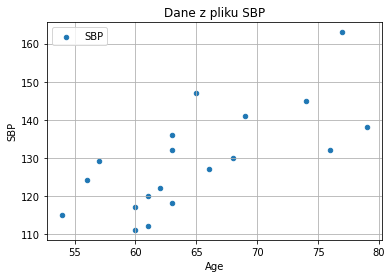

In [416]:
df = pd.read_csv('SBP.csv', index_col=0)
df=df.sort_values(by='Age', axis=0)
df=df.reset_index()
df.plot(kind='scatter', x='Age', y='SBP', label='SBP')
plt.grid()
plt.title('Dane z pliku SBP')
plt.legend()
df

In [417]:
X_train, X_test, y_train, y_test = train_test_split(df.Age, df.SBP, train_size=0.30, test_size=0.7)
X_train = np.array(X_train).reshape(-1,1)
model = LinearRegression()
model.fit(X_train, y_train)

print('Estymowane współczynniki regresji: ', model.coef_)
print('Przewidywana wartość y dla x=0: ', model.intercept_)

Estymowane współczynniki regresji:  [1.38421053]
Przewidywana wartość y dla x=0:  38.41052631578948


Mean Squared Error:  98.31210130589633
Mean Absolute Error:  8.548872180451125
Root Mean Squared Error:  9.915245902442175


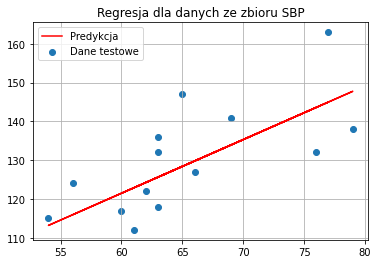

In [418]:
X_test = np.array(X_test).reshape(-1,1)
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, label='Dane testowe')
plt.plot(X_test, y_pred, 'r', label='Predykcja')
plt.title('Regresja dla danych ze zbioru SBP')
plt.grid()
plt.legend()

print('Mean Squared Error: ', sklearn.metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

### Zadanie 2

In [419]:
df = pd.read_csv('PETROL.csv', index_col=0)
df=df.sort_values(by='Zuzycie_paliwa', axis=0)
df=df.reset_index()
df

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,8.00,5319,11868,0.451,344
1,8.00,4399,431,0.544,410
2,7.50,4870,2351,0.529,414
3,10.00,5342,1333,0.571,457
4,8.50,4574,2619,0.551,460
5,8.00,4447,8577,0.529,464
6,9.00,4897,2449,0.511,464
7,8.00,5126,2138,0.553,467
8,7.50,5126,14186,0.525,471
9,8.00,3528,3495,0.487,487


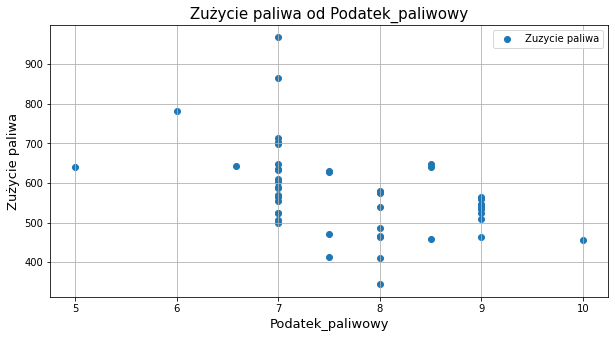

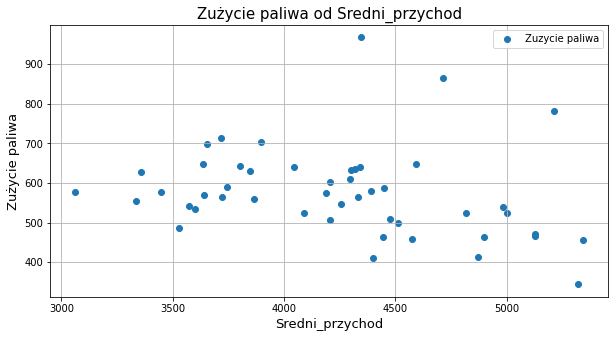

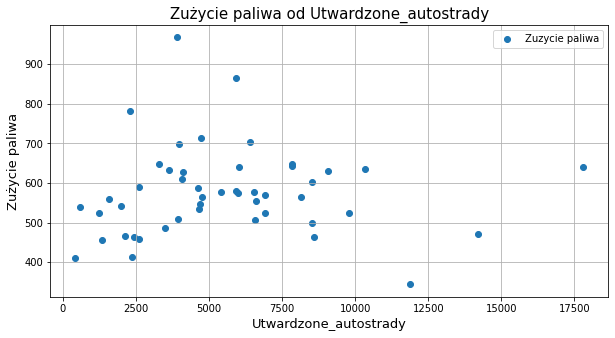

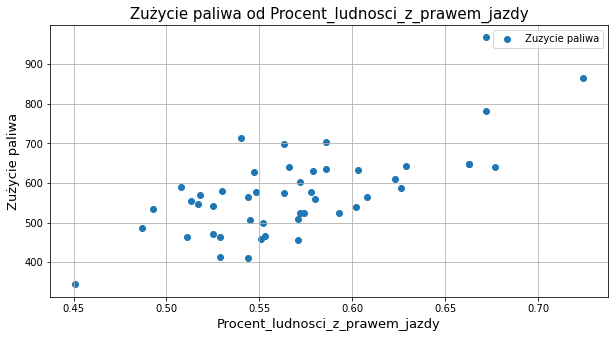

In [420]:
for elem in ['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']:
    plt.figure(figsize=(10, 5))
    plt.scatter(df[elem], df['Zuzycie_paliwa'], label='Zuzycie paliwa')
    plt.title(f'Zużycie paliwa od {elem}', fontsize=15)
    plt.xlabel(elem, fontsize=13)
    plt.ylabel('Zużycie paliwa', fontsize=13)
    plt.grid()
    plt.legend()
    plt.show()

In [421]:
df_x = df.drop('Zuzycie_paliwa', axis=1)

X_train, X_test, y_train, y_test = train_test_split(df_x, df.Zuzycie_paliwa, train_size=0.30, test_size=0.7)
model = LinearRegression()
model.fit(X_train, y_train)

print('Estymowane współczynniki regresji: ', model.coef_)
print('Przewidywana wartość y dla x=0: ', model.intercept_)

Estymowane współczynniki regresji:  [-1.84170809e+01 -3.97973279e-02  5.62666556e-03  1.64178823e+03]
Przewidywana wartość y dla x=0:  -101.07001023373005


In [422]:
y_pred = model.predict(X_test)

print('Mean Squared Error: ', sklearn.metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error: ', sklearn.metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Mean Squared Error:  6831.084388055676
Mean Absolute Error:  64.51662112241718
Root Mean Squared Error:  82.65037439755295


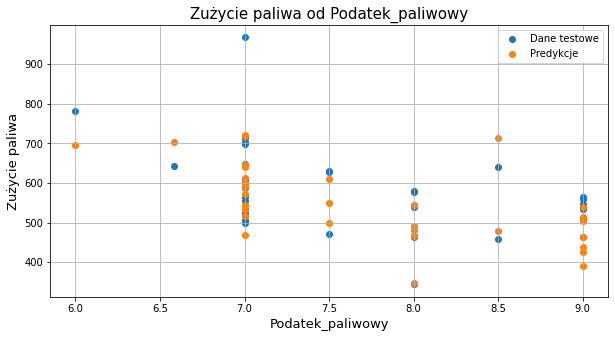

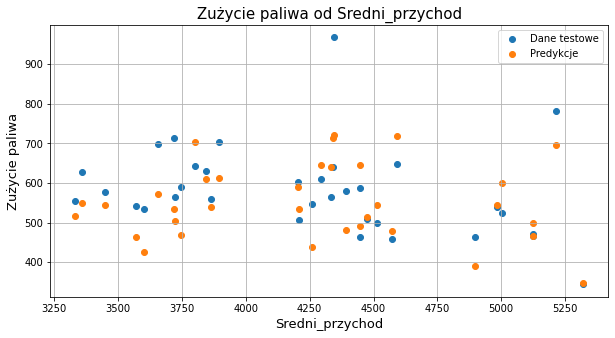

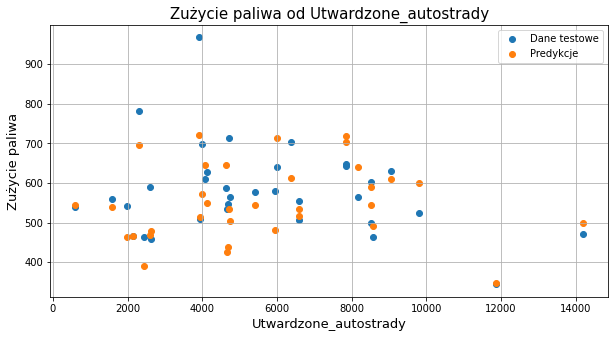

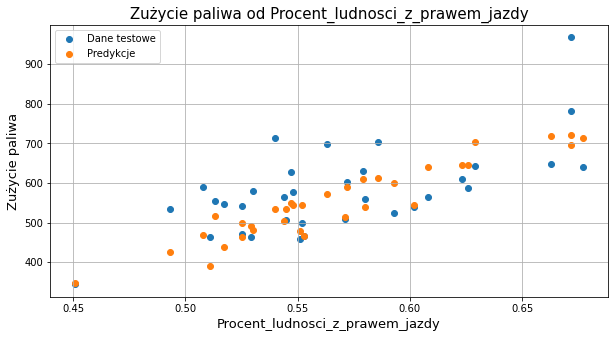

In [423]:
elem = ['Podatek_paliwowy', 'Sredni_przychod', 'Utwardzone_autostrady', 'Procent_ludnosci_z_prawem_jazdy']

for i in range(0, 4):
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test[:,i], y_test)
    plt.scatter(X_test[:,i], y_pred)
    plt.title(f'Zużycie paliwa od {elem[i]}', fontsize=15)
    plt.xlabel(elem[i], fontsize=13)
    plt.ylabel('Zużycie paliwa', fontsize=13)
    plt.legend(['Dane testowe', 'Predykcje'])
    plt.grid()
    plt.show()

### Zadanie 3

In [424]:
df = pd.read_csv('HEART.csv', index_col=0)
df.rename(columns={'num       ': 'num'}, inplace=True)
df = df.replace('?', np.NaN)
df = df.drop(columns=['slope', 'ca', 'thal'])
df = df.dropna(axis=0)
df = df.reset_index()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,30,0,1,170,237,0,1,170,0,0.0,0
3,31,0,2,100,219,0,1,150,0,0.0,0
4,32,0,2,105,198,0,0,165,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
256,52,1,4,160,331,0,0,94,1,2.5,1
257,54,0,3,130,294,0,1,100,1,0.0,1
258,56,1,4,155,342,1,0,150,1,3.0,1
259,58,0,2,180,393,0,0,110,1,1.0,1


Utworzenie zmiennych kategorialnych

In [425]:
df = pd.get_dummies(df, columns=['cp', 'restecg'])


Podział na dane testowe i uczące

In [426]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('num', axis=1), df['num'], train_size=0.2, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [427]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)


C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [428]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       133
           1       0.65      0.84      0.73        76

    accuracy                           0.78       209
   macro avg       0.77      0.79      0.77       209
weighted avg       0.80      0.78      0.78       209



In [429]:
print('Dopasowanie modelu: ', model.score(X_train, y_train))
print('Wspólczynniki determinacji: ', model.coef_)
print('Intercept: ', model.intercept_)

Dopasowanie modelu:  0.9230769230769231
Wspólczynniki determinacji:  [[-0.02762794  0.45562142 -0.0014343   0.00713732  1.00387324 -0.01287463
   0.63778006  1.05010476 -0.14463076 -1.34659313  0.01967169  1.40608994
   0.23856178 -0.4340032   0.12997915]]
Intercept:  [-0.08786957]


Testowanie modelu

In [430]:
y_pred = model.predict(X_test)
print('Predykcja:\n', y_pred)
print()
print('Poprawne wyniki:\n', y_test)

y_res = []
for inx in range(len(y_pred)):
    y_res.append(y_pred[inx] and y_test[inx])

print()
print('Logiczny AND pomiędzy zbiorami predykcji i testowym: \n', np.array(y_res))

Predykcja:
 [0 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1
 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1
 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1]

Poprawne wyniki:
 [0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1]

Logiczny AND pomiędzy zbiorami predykcji i testowym: 
 [0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 

Skalowanie modelu

In [431]:
scale = sklearn.preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)

scale2 = sklearn.preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scale2.transform(X_test)

model_scaled = LogisticRegression().fit(X_train_scaled, y_train)
y_pred = model_scaled.predict(X_test)

In [432]:
print('RMSE: ', np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred)))

print(sklearn.metrics.classification_report(y_test, y_pred))

RMSE:  0.7977240352174656
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.36      1.00      0.53        76

    accuracy                           0.36       209
   macro avg       0.18      0.50      0.27       209
weighted avg       0.13      0.36      0.19       209



C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [433]:
print('Dopasowanie modelu: ', model_scaled.score(X_train, y_train))
print()
print('Współczynniki determinacji: ', model_scaled.coef_)
print('Intercept: ', model_scaled.intercept_)

Dopasowanie modelu:  0.4230769230769231

Współczynniki determinacji:  [[-0.18969986  0.5165357   0.19415984  0.56592113  1.02691657 -0.01121966
   0.51905022  1.14989313 -0.15383625 -1.24339214  0.03481953  1.24793276
   0.36670764 -0.39675232  0.04807451]]
Intercept:  [-0.49556767]


Testowanie modelu

In [434]:
y_pred = model_scaled.predict(X_test)
print('Predykcja:\n', y_pred)
print()
print('Poprawne wyniki:\n', y_test)

Predykcja:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Poprawne wyniki:
 [0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1
 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1]
